# 3. Dashboard

### Understanding

Will be using the pickle files for dataframes

Using streamlit for dashboard

In [8]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


%matplotlib inline


In [2]:
# loading pickles

tiktok_df = pd.read_pickle('tiktok.pkl')
youtube_df = pd.read_pickle('youtube.pkl')

In [3]:
st.dataframe(tiktok_df)

2024-12-11 15:56:13.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2024-12-11 15:56:13.499 
  command:

    streamlit run /home/takosaga/miniconda3/envs/coursework/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-12-11 15:56:13.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

streamlit does not run from notebook, so have to write a py file

In [39]:
%%writefile test.py

import streamlit as st
import pandas as pd

# Assuming your pickle files are in the same directory as the script
tiktok_df = pd.read_pickle('tiktok.pkl')
youtube_df = pd.read_pickle('youtube.pkl')

# Display the DataFrames
st.header("DataFrames from Pickle Files")
st.dataframe(tiktok_df.head())
st.dataframe(youtube_df.head())

Overwriting test.py


In [40]:
# running test.py
# !streamlit run test.py

In [41]:
tiktok_df.head()

,tiktok_view_count,tiktok_like_count,tiktok_comment_count,tiktok_likes_and_comments
0,343296.0,19425.0,0.0,19425.0
1,140877.0,77355.0,684.0,78039.0
2,902185.0,97690.0,329.0,98019.0
3,437506.0,239954.0,584.0,240538.0
4,56167.0,34987.0,152.0,35139.0


In [42]:
tiktok_df.describe()

,tiktok_view_count,tiktok_like_count,tiktok_comment_count,tiktok_likes_and_comments
count,76336.000000,76336.000000,76336.000000,76336.000000
mean,254708.558688,84304.636030,349.312146,84653.948176
std,322886.935826,133417.925044,799.623152,133968.673871
min,20.000000,0.000000,0.000000,0.000000
25%,4942.500000,810.750000,1.000000,813.000000
50%,9954.500000,3403.500000,9.000000,3412.500000
75%,504327.000000,125020.000000,292.000000,125487.000000
max,999817.000000,657830.000000,9599.000000,659520.000000


In [43]:
youtube_df.head()

,youtube_view_count,youtube_like_count,youtube_comment_count,youtube_likes_and_comments
0,77057,909,557,1466
1,188949,3734,1930,5664
2,1922598,20215,3737,23952
3,6013,94,77,171
4,190901,2969,762,3731


In [44]:
youtube_df.describe()

,youtube_view_count,youtube_like_count,youtube_comment_count,youtube_likes_and_comments
count,4.450000e+03,4.450000e+03,4450.000000,4.450000e+03
mean,1.667199e+07,1.803403e+05,4210.897978,1.845512e+05
std,1.410693e+08,8.619444e+05,22026.580878,8.784926e+05
min,1.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,6.616775e+04,1.051500e+03,86.000000,1.283000e+03
50%,4.119610e+05,6.913000e+03,505.000000,7.984000e+03
75%,2.709688e+06,4.872200e+04,2269.000000,5.217000e+04
max,6.104343e+09,1.562634e+07,532252.000000,1.615859e+07


In [35]:
tiktok_df.head()

,tiktok_view_count,tiktok_like_count,tiktok_comment_count,tiktok_likes_and_comments
0,0.274362,-0.486292,-0.436849,-0.486900
1,-0.352545,-0.052090,0.418560,-0.049377
2,2.005286,0.100327,-0.025402,0.099763
3,0.566138,1.166638,0.293500,1.163593
4,-0.614899,-0.369650,-0.246758,-0.369603


In [36]:
youtube_df.head()

,youtube_view_count,youtube_like_count,youtube_comment_count,youtube_likes_and_comments
0,-0.117650,-0.208194,-0.165904,-0.208432
1,-0.116857,-0.204916,-0.103564,-0.203653
2,-0.104566,-0.185793,-0.021517,-0.182833
3,-0.118154,-0.209139,-0.187699,-0.209906
4,-0.116843,-0.205804,-0.156597,-0.205853


In [4]:
scaler = StandardScaler()
tiktok_df[tiktok_df.columns] = scaler.fit_transform(tiktok_df[tiktok_df.columns])
youtube_df[youtube_df.columns] = scaler.fit_transform(youtube_df[youtube_df.columns])

In [5]:
#Remove outliers (using 3 standard deviations as a threshold)
def remove_outliers(df, columns, threshold=3):
    for col in columns:
        df = df[np.abs(df[col]) <= threshold]  # Keep rows within the threshold
    return df

In [6]:
tiktok_df_cleaned = remove_outliers(tiktok_df, tiktok_df.columns)
youtube_df_cleaned = remove_outliers(youtube_df, youtube_df.columns)


In [49]:
tiktok_df_cleaned.head()

,tiktok_view_count,tiktok_like_count,tiktok_comment_count,tiktok_likes_and_comments
0,0.274362,-0.486292,-0.436849,-0.486900
1,-0.352545,-0.052090,0.418560,-0.049377
2,2.005286,0.100327,-0.025402,0.099763
3,0.566138,1.166638,0.293500,1.163593
4,-0.614899,-0.369650,-0.246758,-0.369603


In [50]:
youtube_df_cleaned.head()

,youtube_view_count,youtube_like_count,youtube_comment_count,youtube_likes_and_comments
0,-0.117650,-0.208194,-0.165904,-0.208432
1,-0.116857,-0.204916,-0.103564,-0.203653
2,-0.104566,-0.185793,-0.021517,-0.182833
3,-0.118154,-0.209139,-0.187699,-0.209906
4,-0.116843,-0.205804,-0.156597,-0.205853


### Visualize
Plotting linear regression

In [57]:
corr_matrix = tiktok_df_cleaned.corr()

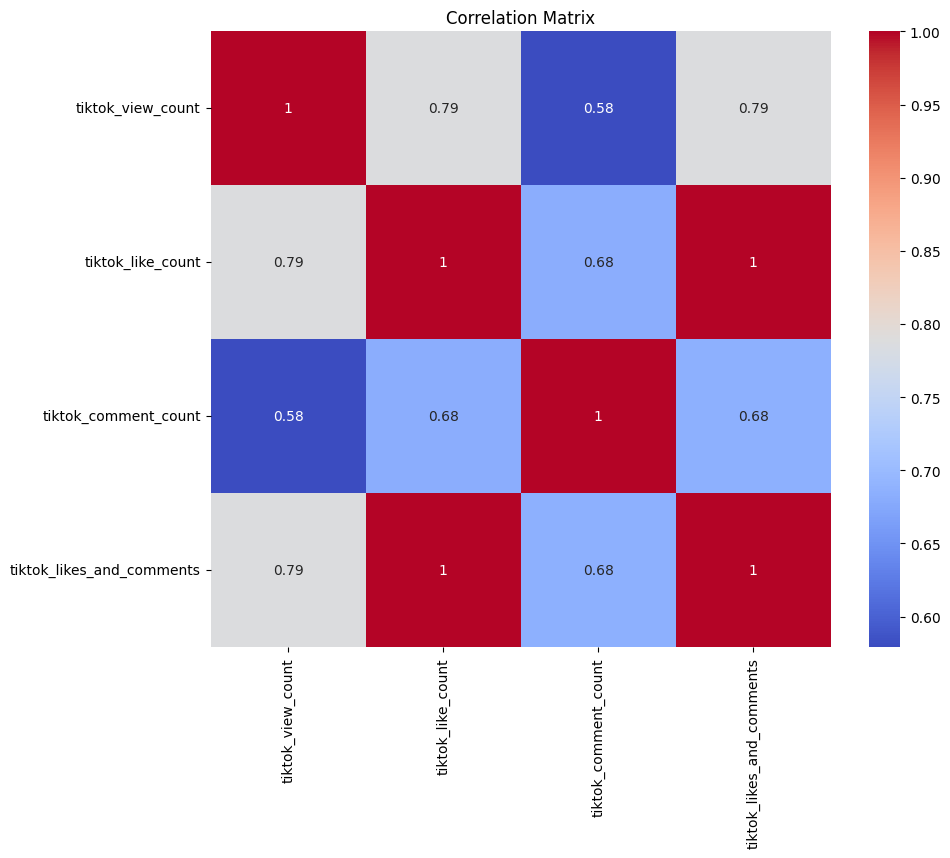

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Text(17.640625000000007, 0.5, 'Like Count')

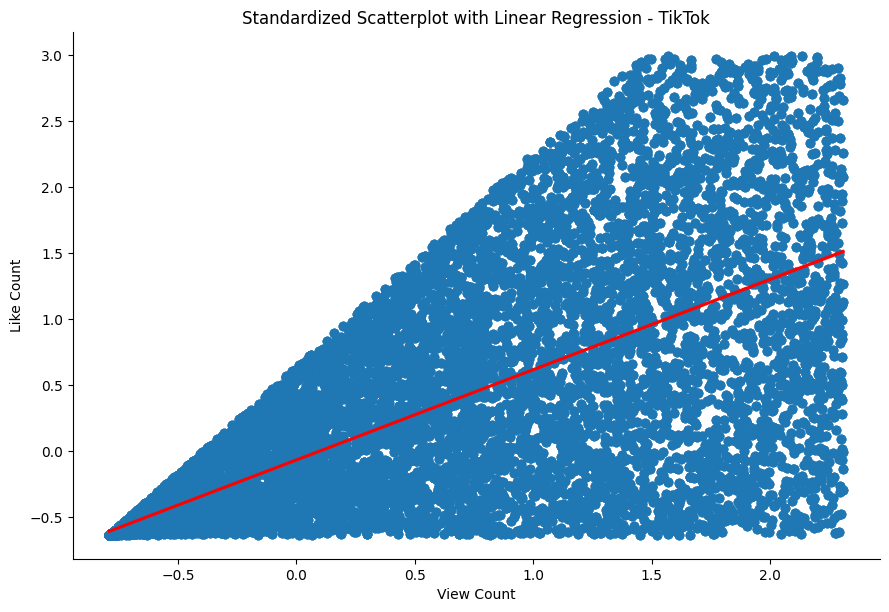

In [64]:
sns.lmplot(
    data=tiktok_df_cleaned, 
    x='tiktok_view_count', 
    y='tiktok_like_count', 
    height=6, 
    aspect=1.5, 
    line_kws={'color': 'red'}
)

plt.title("Standardized Scatterplot with Linear Regression - TikTok")
plt.xlabel("View Count")
plt.ylabel("Like Count")

Text(17.640625000000007, 0.5, 'Comment Count')

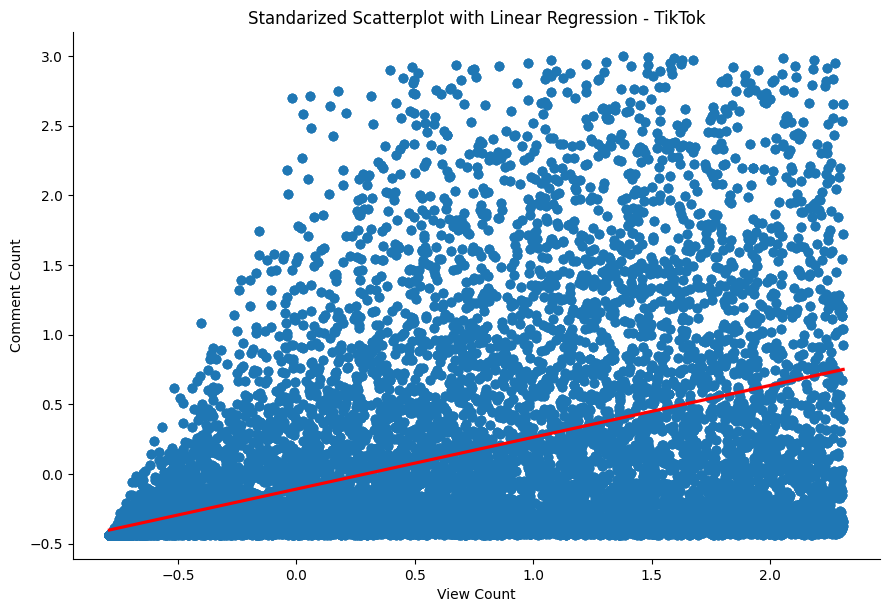

In [65]:
sns.lmplot(
    data=tiktok_df_cleaned, 
    x='tiktok_view_count', 
    y='tiktok_comment_count', 
    height=6, 
    aspect=1.5, 
    line_kws={'color': 'red'}
)

plt.title("Standarized Scatterplot with Linear Regression - TikTok")
plt.xlabel("View Count")
plt.ylabel("Comment Count")

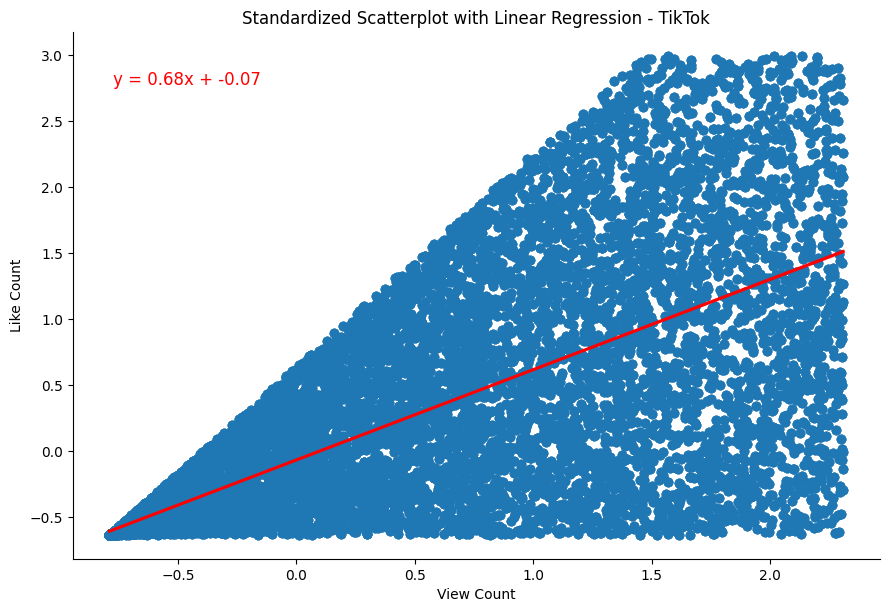

In [12]:
x = tiktok_df_cleaned['tiktok_view_count'].values.reshape(-1, 1)  # Independent variable
y = tiktok_df_cleaned['tiktok_like_count'].values  # Dependent variable

# Fit Linear Regression Model
model = LinearRegression()
model.fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_

# Use sns.lmplot for plotting
sns.lmplot(
    data=tiktok_df_cleaned,
    x='tiktok_view_count',
    y='tiktok_like_count',
    height=6,
    aspect=1.5,
    line_kws={'color': 'red'}
)

# Add Regression Equation as Annotation
plt.text(
    x=0.05,  # Adjust x position in normalized coordinates
    y=0.9,  # Adjust y position in normalized coordinates
    s=f"y = {slope:.2f}x + {intercept:.2f}",
    transform=plt.gca().transAxes,  # Use Axes coordinates for positioning
    fontsize=12,
    color='red'
)

plt.title("Standardized Scatterplot with Linear Regression - TikTok")
plt.xlabel("View Count")
plt.ylabel("Like Count")
plt.show()

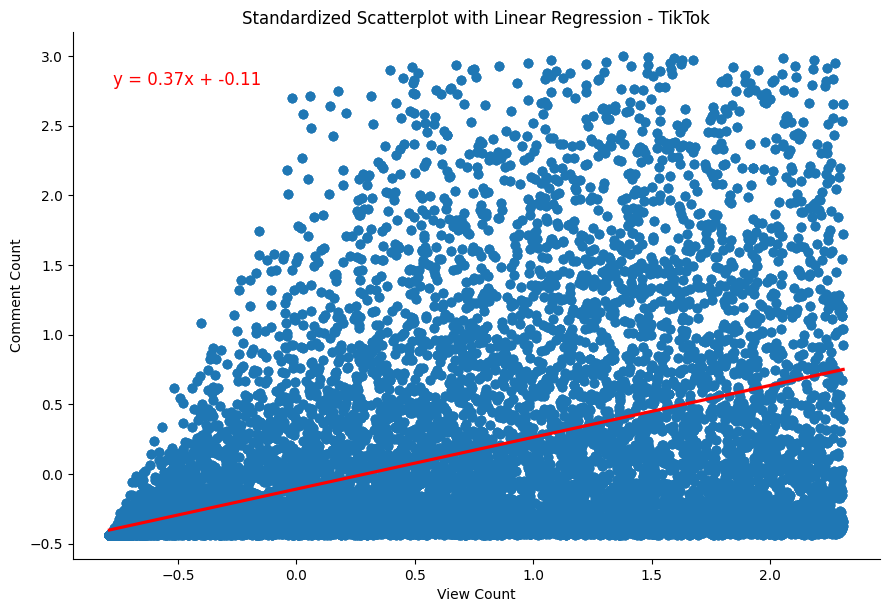

In [13]:
x = tiktok_df_cleaned['tiktok_view_count'].values.reshape(-1, 1)  # Independent variable
y = tiktok_df_cleaned['tiktok_comment_count'].values  # Dependent variable

# Fit Linear Regression Model
model = LinearRegression()
model.fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_

# Use sns.lmplot for plotting
sns.lmplot(
    data=tiktok_df_cleaned,
    x='tiktok_view_count',
    y='tiktok_comment_count',
    height=6,
    aspect=1.5,
    line_kws={'color': 'red'}
)

# Add Regression Equation as Annotation
plt.text(
    x=0.05,  # Adjust x position in normalized coordinates
    y=0.9,  # Adjust y position in normalized coordinates
    s=f"y = {slope:.2f}x + {intercept:.2f}",
    transform=plt.gca().transAxes,  # Use Axes coordinates for positioning
    fontsize=12,
    color='red'
)

plt.title("Standardized Scatterplot with Linear Regression - TikTok")
plt.xlabel("View Count")
plt.ylabel("Comment Count")
plt.show()

In [61]:
corr_matrix2 = youtube_df_cleaned.corr()

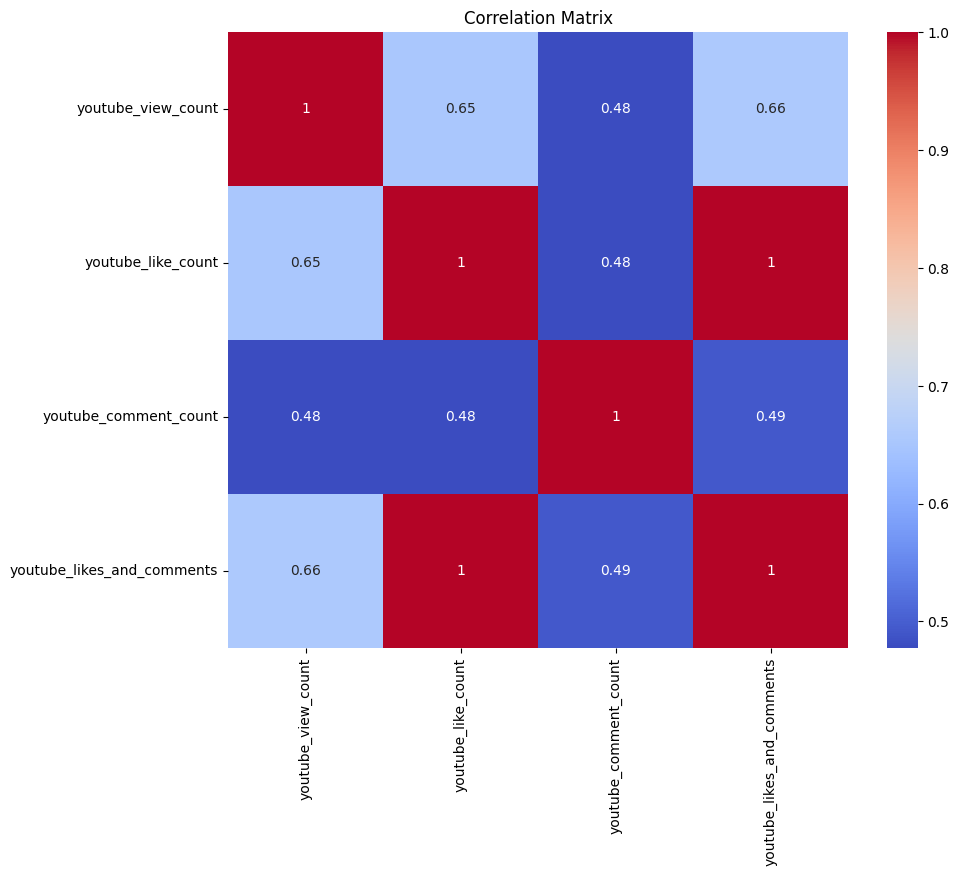

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Text(29.140625000000007, 0.5, 'Like Count')

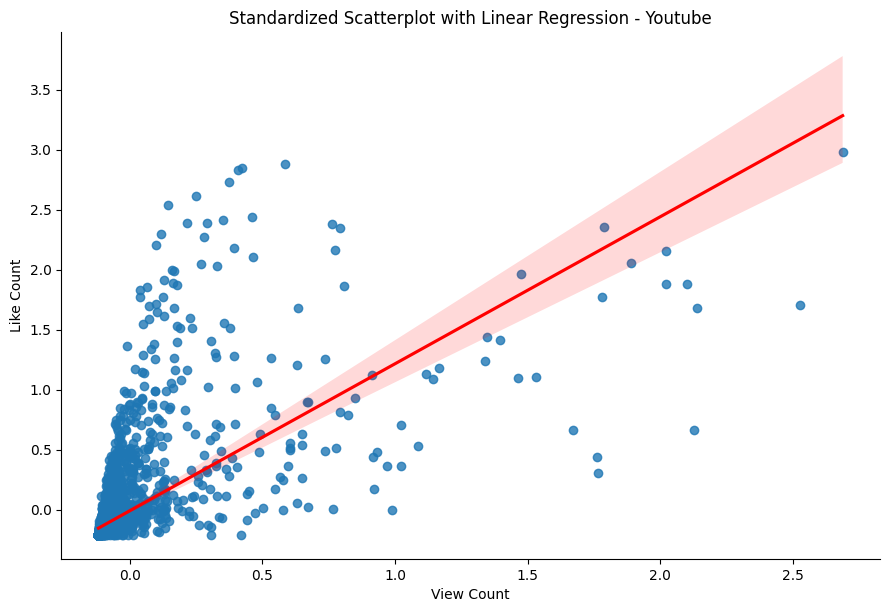

In [69]:
sns.lmplot(
    data=youtube_df_cleaned, 
    x='youtube_view_count', 
    y='youtube_like_count', 
    height=6, 
    aspect=1.5, 
    line_kws={'color': 'red'}
)

plt.title("Standardized Scatterplot with Linear Regression - Youtube")
plt.xlabel("View Count")
plt.ylabel("Like Count")

Text(29.140625000000007, 0.5, 'Comment Count')

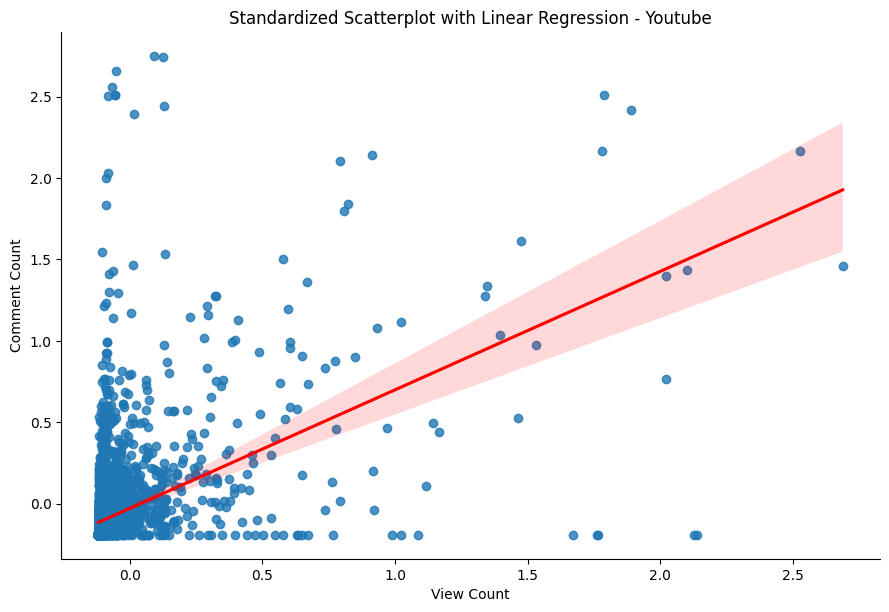

In [70]:
sns.lmplot(
    data=youtube_df_cleaned, 
    x='youtube_view_count', 
    y='youtube_comment_count', 
    height=6, 
    aspect=1.5, 
    line_kws={'color': 'red'}
)

plt.title("Standardized Scatterplot with Linear Regression - Youtube")
plt.xlabel("View Count")
plt.ylabel("Comment Count")

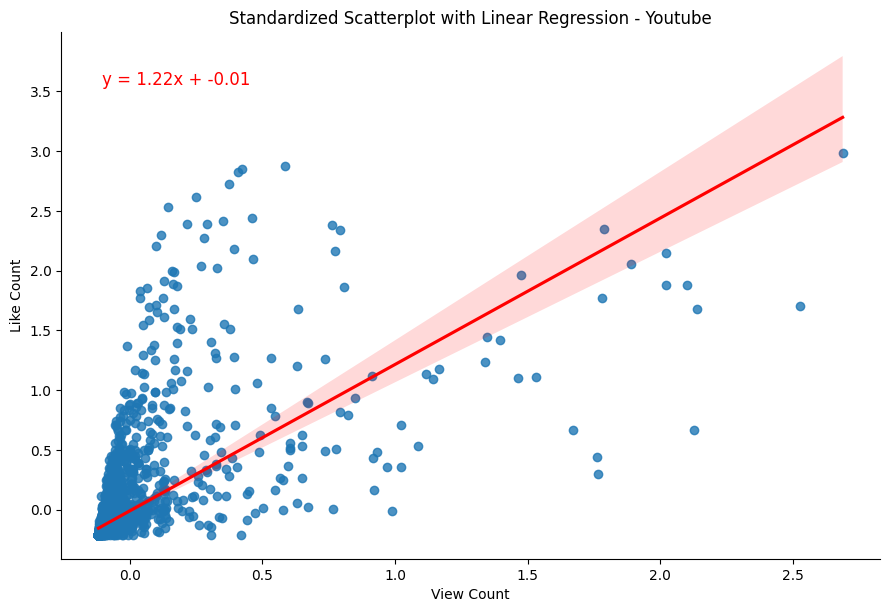

In [9]:

# Calculate regression equation
x = youtube_df_cleaned['youtube_view_count'].values.reshape(-1, 1)  # Independent variable
y = youtube_df_cleaned['youtube_like_count'].values  # Dependent variable

# Fit Linear Regression Model
model = LinearRegression()
model.fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_

# Use sns.lmplot for plotting
sns.lmplot(
    data=youtube_df_cleaned,
    x='youtube_view_count',
    y='youtube_like_count',
    height=6,
    aspect=1.5,
    line_kws={'color': 'red'}
)

# Add Regression Equation as Annotation
plt.text(
    x=0.05,  # Adjust x position in normalized coordinates
    y=0.9,  # Adjust y position in normalized coordinates
    s=f"y = {slope:.2f}x + {intercept:.2f}",
    transform=plt.gca().transAxes,  # Use Axes coordinates for positioning
    fontsize=12,
    color='red'
)

plt.title("Standardized Scatterplot with Linear Regression - Youtube")
plt.xlabel("View Count")
plt.ylabel("Like Count")
plt.show()

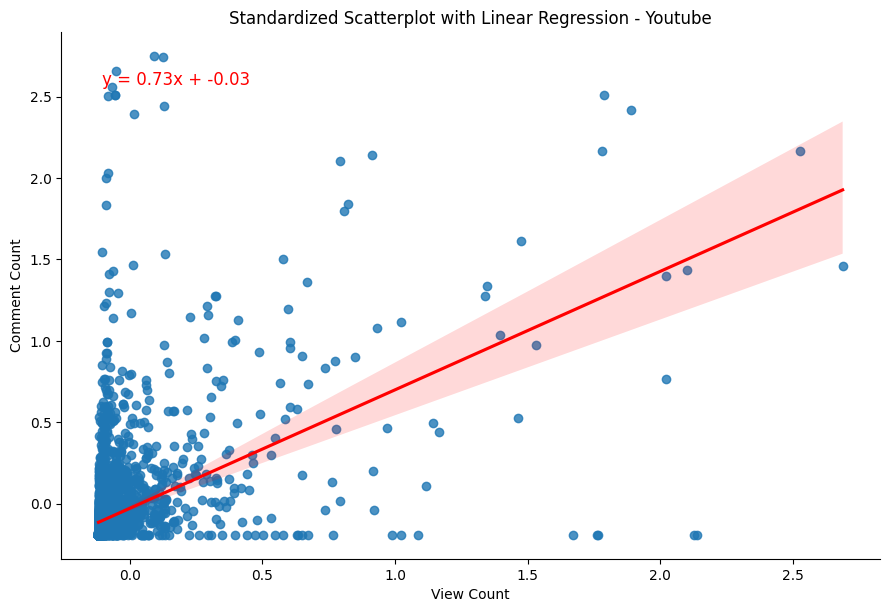

In [10]:
x = youtube_df_cleaned['youtube_view_count'].values.reshape(-1, 1)  # Independent variable
y = youtube_df_cleaned['youtube_comment_count'].values  # Dependent variable

# Fit Linear Regression Model
model = LinearRegression()
model.fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_

# Use sns.lmplot for plotting
sns.lmplot(
    data=youtube_df_cleaned,
    x='youtube_view_count',
    y='youtube_comment_count',
    height=6,
    aspect=1.5,
    line_kws={'color': 'red'}
)

# Add Regression Equation as Annotation
plt.text(
    x=0.05,  # Adjust x position in normalized coordinates
    y=0.9,  # Adjust y position in normalized coordinates
    s=f"y = {slope:.2f}x + {intercept:.2f}",
    transform=plt.gca().transAxes,  # Use Axes coordinates for positioning
    fontsize=12,
    color='red'
)

plt.title("Standardized Scatterplot with Linear Regression - Youtube")
plt.xlabel("View Count")
plt.ylabel("Comment Count")
plt.show()

### Dashboard
Using streamlit and chatgpt to create a dashboard

In [1]:
%%writefile  tiktok_youtube_dashboard.py

import requests
import io
import streamlit as st
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Custom Color Palette (using provided hex values)
COLORS = {
    'primary': '#007bff',  # Blue
    'secondary': '#fd7e14',  # Orange
    'background': '#f8f9fa ',  # Dark Gray
    'card': '#ffffff',   # Light Gray
    'text': '#33333',   # Grayish Blue
    'accent': '#007bff'   # Blue
}

# Configure Streamlit layout
st.set_page_config(
    layout="wide",
    page_title="Social Media Analytics",
    page_icon="📊",
    initial_sidebar_state="expanded"
)

# Custom CSS for modern styling
st.markdown(f"""
    <style>
        /* Main container */
        .main {{
            background-color: {COLORS['background']}; 
            padding: 2rem;
        }}
        
        /* Headers */
        h1, h2, h3 {{
            color: {COLORS['text']} !important;
            font-family: 'Segoe UI', sans-serif;
            font-weight: 600;
        }}
        
        /* Sidebar */
        .css-1d391kg {{
            background-color: {COLORS['card']};
        }}
        
        /* Cards */
        div[data-testid="stMetricValue"] {{
            background-color: {COLORS['card']};
            padding: 1rem;
            border-radius: 10px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
        }}
        
        /* Widgets */
        .stSelectbox, .stRadio > label {{
            color: {COLORS['text']} !important;
        }}
        
        /* Sliders */
        .stSlider > div > div {{
            background-color: {COLORS['background']}; 
            border-radius: 10px;
        }}
        
        /* Custom container for graphs */
        .graph-container {{
            background-color: {COLORS['card']};
            border-radius: 15px;
            padding: 1.5rem;
            margin: 1rem 0;
            box-shadow: 0 4px 12px rgba(0, 0, 0, 0.15);
        }}
        
        /* Footer */
        .footer {{
            text-align: center;
            padding: 2rem;
            color: {COLORS['text']};
            font-size: 0.9rem;
            margin-top: 2rem;
            border-top: 1px solid rgba(255, 255, 255, 0.1);
        }}
    </style>
""", unsafe_allow_html=True)

# Dashboard Header with Icon
st.markdown(f"""
    <div style='text-align: center; padding: 1rem 0 2rem 0;'>
        <h1 style='font-size: 2.5rem; font-weight: 600;'>
            <span style='color: {COLORS["secondary"]}'>📊</span> 
            Social Media Analytics Dashboard
        </h1>
        <p style='color: {COLORS["text"]}; font_size: 1.1rem;'>
            TikTok & YouTube Metric Performances Over Views
        </p>
    </div>
""", unsafe_allow_html=True)

def load_pickle_from_github(url):
    """
    Loads a pickle file from a given GitHub URL.

    Args:
        url: The URL of the pickle file on GitHub.

    Returns:
        A pandas DataFrame containing the data loaded from the pickle file.
    """

    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes

    try:
        data = pd.read_pickle(io.BytesIO(response.content))
    except Exception as e:
        print(f"Error loading pickle from {url}: {e}")
        return None

    return data

# Load the pickle files from GitHub
tiktok_df = load_pickle_from_github("https://github.com/Takosaga/fall_24/blob/main/big_data/coursework_assignment/tiktok.pkl?raw=true")
youtube_df = load_pickle_from_github("https://github.com/Takosaga/fall_24/blob/main/big_data/coursework_assignment/youtube.pkl?raw=true")


# Standardize column names
tiktok_df.rename(columns={
    'tiktok_view_count': 'view_count',
    'tiktok_like_count': 'like_count',
    'tiktok_comment_count': 'comment_count'
}, inplace=True)
youtube_df.rename(columns={
    'youtube_view_count': 'view_count',
    'youtube_like_count': 'like_count',
    'youtube_comment_count': 'comment_count'
}, inplace=True)

# Sidebar controls
st.sidebar.header("Settings")
y_metric = st.sidebar.selectbox("Choose Y-axis Metric", ["like_count", "comment_count"])
standardize = st.sidebar.checkbox("Standardize Metrics (z-scores)", value=True)
remove_outliers = st.sidebar.checkbox("Remove Outliers", value=True)
show_points = st.sidebar.checkbox("Show Data Points", value=False)

# Create columns for side-by-side plots
col1, col2 = st.columns(2)

# Function to create a single scatter plot
def create_scatter_plot(platform_data, platform_name, y_metric):
    fig = go.Figure()

    # Remove outliers if selected
    if remove_outliers:
        q1 = platform_data['view_count'].quantile(0.25)
        q3 = platform_data['view_count'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        platform_data = platform_data[(platform_data[y_metric] >= lower_bound) & (platform_data[y_metric] <= upper_bound)]

    # Standardize data if selected
    if standardize:
        scaler = StandardScaler()
        platform_data[['view_count', y_metric]] = scaler.fit_transform(platform_data[['view_count', y_metric]])

    x = platform_data['view_count'].values.reshape(-1, 1)  # Reshape x for LinearRegression
    y = platform_data[y_metric].values
    reg = LinearRegression().fit(x, y)
    platform_data['regression_line'] = reg.predict(x)

    # Calculate and format regression equation
    slope = reg.coef_[0]
    intercept = reg.intercept_
    equation = f"y = {slope:.3f}x + {intercept:.3f}"

    fig.add_trace(go.Scatter(
        x=platform_data['view_count'],
        y=platform_data[y_metric],
        mode='markers' if show_points else 'none',  # Show/hide data points
        marker=dict(size=8, opacity=0.7),
        name=f'{platform_name} Data Points',
        marker_color=platform_colors[platform_name]
    ))

    fig.add_trace(go.Scatter(
        x=platform_data['view_count'],
        y=platform_data['regression_line'],
        mode='lines',
        name=f'{platform_name} Regression Line',
        line=dict(width=3, color=platform_colors[platform_name]),
        text=equation,  # Add equation to hovertext
    ))

    # Display equation directly on the plot
    fig.add_annotation(
        x=0.05,  # Adjust x position as needed
        y=0.9,  # Adjust y position as needed
        xref="paper",
        yref="paper",
        text=equation,
        showarrow=False,
        font=dict(size=14, color=platform_colors[platform_name])
    )

    fig.update_layout(
        title=f"{platform_name}: Views vs {y_metric.replace('_', ' ').title()}",
        xaxis_title='Views',
        yaxis_title=y_metric.replace('_', ' ').title(),
        showlegend=True,
        title_x=0.5,
        plot_bgcolor=COLORS['background']  # Set the plot background color
    )
    return fig

# Define colors for each platform
platform_colors = {
    'TikTok': COLORS['primary'],
    'YouTube': COLORS['secondary']
}

# Create plots for each platform
tiktok_fig = create_scatter_plot(tiktok_df, 'TikTok', y_metric)
youtube_fig = create_scatter_plot(youtube_df, 'YouTube', y_metric)

# Display plots in columns
with col1:
    st.plotly_chart(tiktok_fig, use_container_width=True)

with col2:
    st.plotly_chart(youtube_fig, use_container_width=True)

summary_text = st.empty()

summary_text.markdown(f"""
    <div style="background-color: {COLORS['background']}; padding: 1rem; border-radius: 10px; margin-top: 1rem;">
    <h3>Summary</h3>
    <p>
        This dashboard analyzes the relationship between views and {y_metric.replace('_', ' ').title()} for TikTok and YouTube videos. 
        The regression lines show a positive correlation between views and {y_metric} for both platforms.
        More views bring in more likes at a greater rate for TikTok than Youtube.
        More views bring in more comments at a slighlty greater rate for YouTube than TikTok.
        Data has been standardized using z-scores. Outliers were removed using the IQR method. 
    </p>
    <h4>Technologies Used:</h4>
    <ul>
        <li><b>Streamlit:</b> For building the interactive web application.</li>
        <li><b>Pandas:</b> For data manipulation and cleaning.</li>
        <li><b>Plotly:</b> For creating interactive and visually appealing charts.</li>
        <li><b>Seaborn:</b> For statistical graphics and data visualization.</li>
        <li><b>NumPy:</b> For numerical computing and array operations.</li>
        <li><b>Matplotlib:</b> For creating static, animated, and interactive visualizations.</li>
        <li><b>Scikit-learn:</b> For machine learning algorithms, including linear regression.</li>
        <li><b>SciPy:</b> For scientific and technical computing.</li>
        <li><b>SQLite:</b> For relational database management.</li>
        <li><b>MongoDB:</b> For NoSQL document database management.</li>
    </ul>
    <p>
        19,383 rows of TikTok data gathered from <a href="https://www.kaggle.com/datasets/yakhyojon/tiktok">Kaggle</a>. <br>
        4,450 rows Youtube data gathered from <a href="https://developers.google.com/youtube/v3/docs/">Google YouTube API</a>. <br>
        More data for YouTube should be gathered for more robust analysis. <br>
        <a href="https://github.com/Takosaga/fall_24/tree/main/coursework_assignment">Full Project Repo</a> <br>
    </p>
</div>
""", unsafe_allow_html=True)

# Modern footer
st.markdown(f"""
    <div class='footer'>
        <p>
            <span style='color: {COLORS["accent"]}'>⚡</span> 
            Powered by Streamlit | 
            <span style='color: {COLORS["secondary"]}'>❤️</span> 
            Analytics Dashboard v1.0
        </p>
    </div>
""", unsafe_allow_html=True)

Overwriting tiktok_youtube_dashboard.py


In [1]:
!streamlit run tiktok_youtube_dashboard.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.8.16:8501

/home/takosaga/Projects/fall_24/big_data/coursework_assignment/tiktok_youtube_dashboard.py:171: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/takosaga/Projects/fall_24/big_data/coursework_assignment/tiktok_youtube_dashboard.py:176: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

^C
  Stopping...


### Using dask

In [12]:
import dask.dataframe as dd

# Load data with Dask
tiktok_ddf = dd.from_pandas(tiktok_df, npartitions=2)
# Rename columns (using Dask's rename method)
tiktok_ddf = tiktok_ddf.rename(columns={
    'tiktok_view_count': 'view_count',
    'tiktok_like_count': 'like_count',
    'tiktok_comment_count': 'comment_count'
})

# Calculate summary statistics (Dask will compute lazily)
mean_views = tiktok_ddf['view_count'].mean().compute()